In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

%pylab inline

Populating the interactive namespace from numpy and matplotlib


##Generate Data

In [2]:
n_data_per_class = 50
num_class = 2
dim_data = 2
n_data = n_data_per_class * num_class
n_train = 50

data1 = np.random.multivariate_normal([4,0], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data2 = np.random.multivariate_normal([0,4], [[1,0],[0,1]], n_data_per_class).astype(np.float32)
data_x = np.vstack([data1,data2])
data_y = np.hstack([np.ones((n_data_per_class,)), -np.ones((n_data_per_class,))])


##Data Visualization

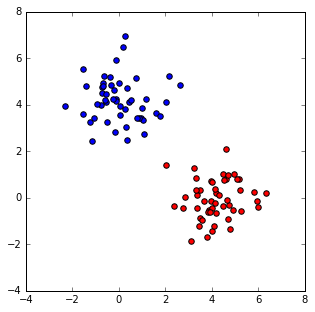

In [3]:

plt.rcParams['figure.figsize']=(5,5)
plt.scatter(data1[:,0],data1[:,1],30,'r')
plt.scatter(data2[:,0],data2[:,1],30,'b')
[x1min,x1max,x2min,x2max] = plt.axis()
x1val = np.arange(x1min,x1max,0.1)
plt.axis([x1min,x1max,x2min,x2max])
plt.show()
    

# logistic regression model


###$$P(y_i|x_i;w,b) = \frac{1}{1+exp(-(wx_i+b)y_i)}$$
###$$\mathcal{L}(w,b) = -\frac{1}{n}\sum_{i=1}^n log(P(y_i|x_i;w,b))$$###

In [4]:
# Create the model

x = tf.placeholder(tf.float32, [None, dim_data])
W = tf.Variable(tf.zeros([dim_data,1]))
b = tf.Variable(tf.zeros([1]))
y_true = tf.placeholder(tf.float32, [None])

In [5]:
a = tf.matmul(x, W) + b
p_y = tf.sigmoid(tf.mul(a ,tf.reshape(y_true, [-1,1]) ))

In [6]:
loss = tf.reduce_mean(-tf.log(p_y))

In [7]:
train_step = tf.train.GradientDescentOptimizer(0.5).minimize(loss)

In [8]:
config = tf.ConfigProto()
config.gpu_options.allow_growth=True
sess = tf.Session(config=config)
sess.run(tf.initialize_all_variables())


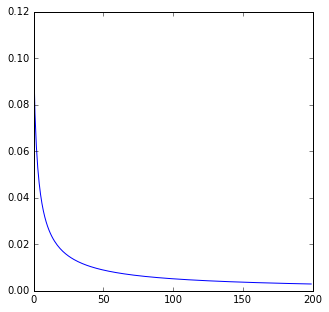

In [9]:
# Train    
idx =[2*i for i in range(50)]

loss_history = []
for i in range(200):
    train_x = data_x[idx]
    train_y = data_y[idx]
    sess.run(train_step, feed_dict={x: train_x, y_true: train_y})
    loss_history.append( sess.run(loss, feed_dict={x: train_x, y_true: train_y}) )
    #print sess.run( p_y, feed_dict={x: train_x, y_true: train_y})
    #print sess.run(W), sess.run(b)
    


plt.plot(loss_history)

In [10]:
result

NameError: name 'result' is not defined

[[ 1.96814668]
 [-1.99605405]] [-0.04337417]


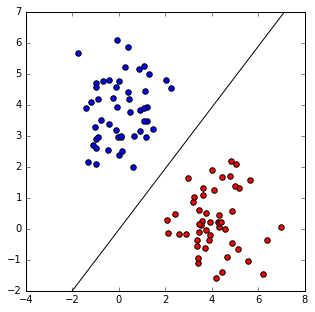

In [13]:
plt.rcParams['figure.figsize']=(5,5)
plt.scatter(data1[:,0],data1[:,1],30,'r')
plt.scatter(data2[:,0],data2[:,1],30,'b')
[x1min,x1max,x2min,x2max] = plt.axis()
x1val = np.arange(x1min,x1max,0.1)
wval = sess.run(W) # 2 by 1   
bval = sess.run(b) # 1
print wval, bval
plt.plot(x1val, -(wval[0]*x1val+bval)/wval[1], 'k')
plt.axis([x1min,x1max,x2min,x2max])
plt.show()